In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_tratado.csv')

In [3]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', header=0, sep = ",")


In [4]:

df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM', 'BAIXA_RENDA', 'ESCOLA_PUBLICA', 'ETNIA_PPI',
       'PCD', 'ESTADO'],
      dtype='object')

In [5]:
df_completo

ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
52604          2023                  1                       SiSU  Grupo A   
52605          2023                  1                       SiSU  Grupo C   
52606          2023                  1                       SiSU  Grupo C   
52607          2023                  1                       PISM  Grupo B   
52608          2023                  1                       PISM  Grupo D   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
52604  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
52605  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
52606  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
52607  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
52608  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...        LAT  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ... -21.753129   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ... -21.804313   
2           Abandono  JUIZ DE FORA  INTEGRAL  ... -21.750069   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ... -21.718564   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ... -20.850899   
...              ...           ...       ...  ...        ...   
52604  A Especificar  JUIZ DE FORA  INTEGRAL  ... -20.678101   
52605  A Especificar  JUIZ DE FORA  INTEGRAL  ... -15.601411   
52606  A Especificar  JUIZ DE FORA  INTEGRAL  ... -22.470962   
52607    Desistência  JUIZ DE FORA  INTEGRAL  ... -21.120123   
52608  A Especificar  JUIZ DE FORA  INTEGRAL  ... -21.735352   

                                                  LOCAL   LNG_ORGM   LAT_ORGM  \
0                 VALE DO IPE, JUIZ DE FORA, MG, BRASIL        NaN        NaN   
1      PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL        NaN        NaN   
2              SANTA CATARINA, JUIZ DE FORA, MG, BRASIL        NaN        NaN   
3                               ANDRELANDIA, MG, BRASIL        NaN        NaN   
4                             PAULA CANDIDO, MG, BRASIL        NaN        NaN   
...                                                 ...        ...        ...   
52604                                 CANAA, MG, BRASIL -42.609760 -20.678101   
52605                                CUIABA, MT, BRASIL -56.097892 -15.601411   
52606                               RESENDE, RJ, BRASIL -44.451329 -22.470962   
52607                                   UBA, MG, BRASIL -42.942619 -21.120123   
52608    FRANCISCO BERNARDINO, JUIZ DE FORA, MG, BRASIL -42.614181 -21.196919   

                LOCAL_ORGM BAIXA_RENDA  ESCOLA_PUBLICA  ETNIA_PPI  PCD ESTADO  
0                      NaN         NaN             NaN        NaN  NaN    NaN  
1                      NaN         Sim             Sim        Não  Não    NaN  
2                      NaN         Não             Não        Não  Não    NaN  
3                      NaN         Não             Não        Não  Não    NaN  
4                      NaN         Sim             Sim        N

In [6]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [7]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Número de alunos evadidos')

In [8]:
# Código para excluir as linhas que não quero que entre análise
indices_para_remover = [13, 14, 15]

evadidos_por_ano = evadidos_por_ano.drop(indices_para_remover)

Coeficiente 'a': 49.35714285714286
Coeficiente 'b': -98259.90109890111


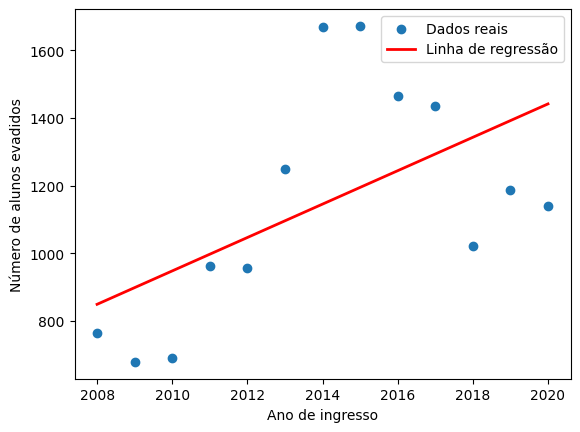

In [9]:
# Separar as variáveis independentes (x) e dependentes (y)
x = evadidos_por_ano['ANO_INGRESSO'].values.reshape(-1, 1)
y = evadidos_por_ano['Número de alunos evadidos'].values

# Inicializar o modelo de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(x, y)

# Obter e imprimir os coeficientes 'a' e 'b'
a = regressor.coef_[0]
b = regressor.intercept_
print(f"Coeficiente 'a': {a}")
print(f"Coeficiente 'b': {b}")

# Fazer previsões com o modelo ajustado
y_pred = regressor.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.xlabel('Ano de ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

Período até 2012 - Coeficiente 'a': 66.69999999999999, Coeficiente 'b': -133256.79999999996
Período após 2012 - Coeficiente 'a': -61.36904761904765, Coeficiente 'b': 125105.55952380958


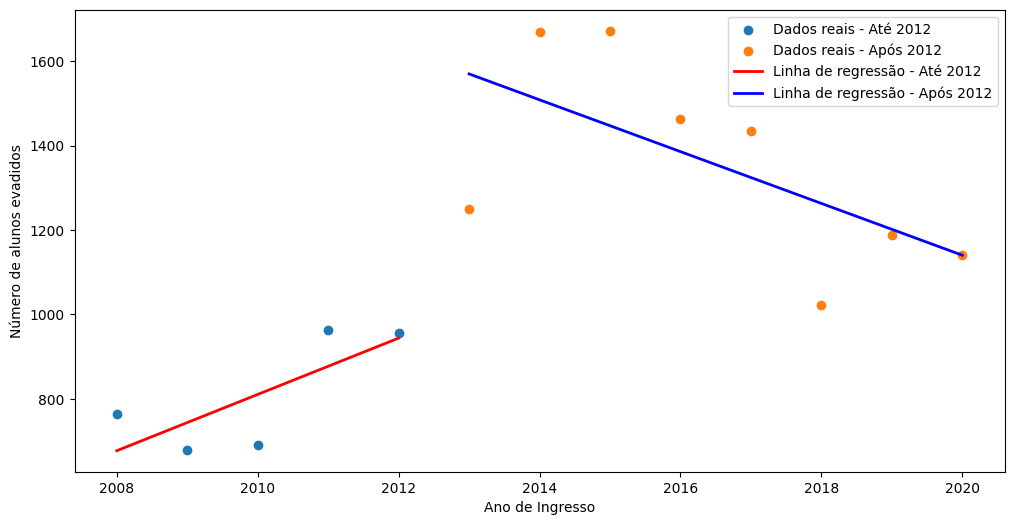

In [10]:
# Dividir os dados em dois períodos: até 2012 e após 2012
periodo_ate_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] <= 2012]
periodo_apos_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] > 2012]

# Separar as variáveis independentes (x) e dependentes (y) para cada período
x_ate_2012 = periodo_ate_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_ate_2012 = periodo_ate_2012['Número de alunos evadidos'].values

x_apos_2012 = periodo_apos_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_apos_2012 = periodo_apos_2012['Número de alunos evadidos'].values

# Inicializar e ajustar o modelo de regressão linear para os dois períodos
regressor_ate_2012 = LinearRegression()
regressor_ate_2012.fit(x_ate_2012, y_ate_2012)

regressor_apos_2012 = LinearRegression()
regressor_apos_2012.fit(x_apos_2012, y_apos_2012)

# Obter os coeficientes 'a' e 'b' para cada período
a_ate_2012 = regressor_ate_2012.coef_[0]
b_ate_2012 = regressor_ate_2012.intercept_

a_apos_2012 = regressor_apos_2012.coef_[0]
b_apos_2012 = regressor_apos_2012.intercept_

print(f"Período até 2012 - Coeficiente 'a': {a_ate_2012}, Coeficiente 'b': {b_ate_2012}")
print(f"Período após 2012 - Coeficiente 'a': {a_apos_2012}, Coeficiente 'b': {b_apos_2012}")

# Fazer previsões com os modelos ajustados para cada período
y_pred_ate_2012 = regressor_ate_2012.predict(x_ate_2012)
y_pred_apos_2012 = regressor_apos_2012.predict(x_apos_2012)

# Plotar os dados e as linhas de regressão para cada período
plt.figure(figsize=(12, 6))
plt.scatter(x_ate_2012, y_ate_2012, label='Dados reais - Até 2012')
plt.scatter(x_apos_2012, y_apos_2012, label='Dados reais - Após 2012')
plt.plot(x_ate_2012, y_pred_ate_2012, color='red', linewidth=2, label='Linha de regressão - Até 2012')
plt.plot(x_apos_2012, y_pred_apos_2012, color='blue', linewidth=2, label='Linha de regressão - Após 2012')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

In [11]:
#Análise R².  
score = regressor_ate_2012.score(x_ate_2012, y_ate_2012)
print(score)

0.5696635457534829


In [12]:
#Análise R².  
score = regressor_apos_2012.score(x_apos_2012, y_apos_2012)
print(score)

0.382309799578994


In [13]:
import statsmodels.api as sm

In [14]:
# Crie e ajuste o modelo de regressão para o período até 2012
modelo_ate_2012 = sm.OLS(y_ate_2012, sm.add_constant(x_ate_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_ate_2012 = modelo_ate_2012.summary()

# Imprima o resumo no console
print("Resumo para o período até 2012:")
print(resumo_ate_2012)

# Crie e ajuste o modelo de regressão para o período após 2012
modelo_apos_2012 = sm.OLS(y_apos_2012, sm.add_constant(x_apos_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_apos_2012 = modelo_apos_2012.summary()

# Imprima o resumo no console
print("Resumo para o período após 2012:")
print(resumo_apos_2012)

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Resumo para o período até 2012:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     3.971
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.140
Time:                        15:39:18   Log-Likelihood:                -29.127
No. Observations:                   5   AIC:                             62.25
Df Residuals:                       3   BIC:                             61.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.333e+0

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
evadidos_por_cota = df_evadidos.groupby('COTA').size().reset_index(name='Alunos evadidos por cota')
evadidos_por_cota

COTA  Alunos evadidos por cota
0            Grupo A                      1843
1           Grupo A1                        20
2            Grupo B                      2183
3   Grupo B - antigo                         2
4           Grupo B1                        15
5            Grupo C                      7748
6   Grupo C - antigo                         5
7            Grupo D                      1611
8           Grupo D1                        29
9            Grupo E                      1186
10          Grupo E1                         5
11           Grupo F                         4
12       Vaga Ociosa                       564

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
evadidos_por_curso = df_evadidos.groupby('CURSO_NOME').size().reset_index(name='Total de alunos evadidos')
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Ano de ingresso')

C:\Users\glaucia.cerqueira\AppData\Local\Temp\ipykernel_9004\920681198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=evadidos_por_curso, x="CURSO_NOME", y="Total de alunos evadidos", palette="deep")


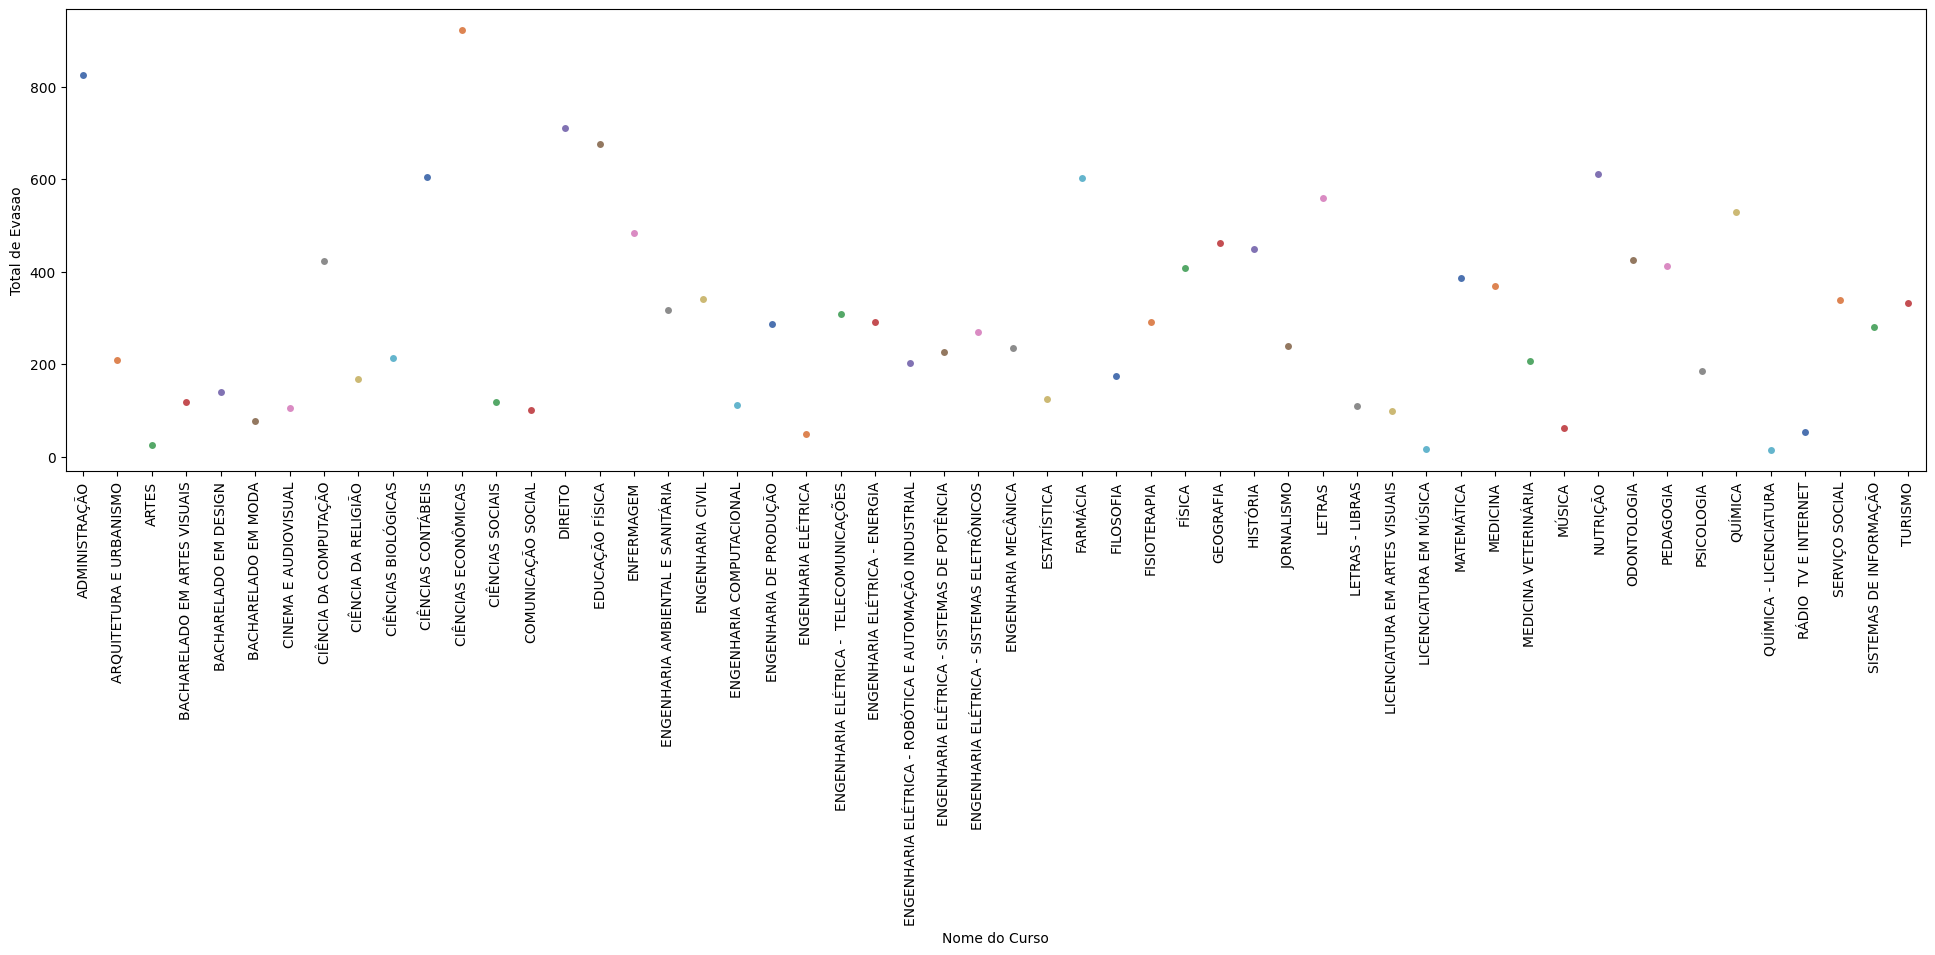

In [18]:
# Crie um swarmplot
plt.figure(figsize=(24, 6))  # Defina o tamanho da figura
sns.swarmplot(data=evadidos_por_curso, x="CURSO_NOME", y="Total de alunos evadidos", palette="deep")

#sns.swarmplot(x='CURSO_NOME', y='Total de alunos evadidos', data=evadidos_por_curso, hue="size", palette="deep")

# Rotacione os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=90)

# Adicione rótulos aos eixos
plt.xlabel('Nome do Curso')
plt.ylabel('Total de Evasao')

# Exiba o gráfico
plt.show()